In [1]:
# Import standard libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Move up one level to data, then access raw
file_path = '../data/raw/retail_sales_dataset.csv'

# Load the CSV file
retail_data = pd.read_csv(file_path)

# Display the first few rows of the data
print(retail_data.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [3]:
import pandas as pd
import holidays

# Assuming retail_data['Date'] is a datetime column
retail_data['Date'] = pd.to_datetime(retail_data['Date'])

# Initialize Canadian holidays for 2023 and 2024
canadian_holidays = holidays.Canada(years=[2023, 2024])

# Create a column for whether the date is a holiday
retail_data['is_holiday'] = retail_data['Date'].dt.date.isin(canadian_holidays.keys())

# Alternatively, map the holiday name to the date, leaving NaN for non-holidays
retail_data['holiday_name'] = retail_data['Date'].dt.date.map(canadian_holidays).fillna('Not a holiday')

# Check the updated data
print(retail_data.head())



   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  is_holiday   holiday_name  
0         3              50           150       False  Not a holiday  
1         2             500          1000       False  Not a holiday  
2         1              30            30       False  Not a holiday  
3         1             500           500       False  Not a holiday  
4         2              50           100       False  Not a holiday  


In [4]:
# Filter the data for holidays
holidays_data = retail_data[retail_data['is_holiday'] == True]

# Display the holidays and their corresponding names
print(holidays_data[['Date', 'holiday_name']])


          Date               holiday_name
77  2023-07-01                 Canada Day
162 2023-01-02  New Year's Day (observed)
179 2023-01-01             New Year's Day
210 2024-01-01             New Year's Day
259 2023-07-01                 Canada Day
296 2023-09-04                 Labour Day
302 2023-01-02  New Year's Day (observed)
420 2023-01-02  New Year's Day (observed)
454 2023-07-01                 Canada Day
521 2023-01-01             New Year's Day
558 2023-01-01             New Year's Day
649 2024-01-01             New Year's Day
756 2023-12-25              Christmas Day
836 2023-07-01                 Canada Day
978 2023-01-02  New Year's Day (observed)


In [5]:
# Add the month, quarter, and day of the week
retail_data['month'] = retail_data['Date'].dt.month
retail_data['quarter'] = retail_data['Date'].dt.quarter
retail_data['day_of_week'] = retail_data['Date'].dt.dayofweek  # 0=Monday, 6=Sunday

# Function to assign season based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Create a 'season' column
retail_data['season'] = retail_data['month'].apply(get_season)

# Check the updated data
print(retail_data[['Date', 'season']].head())



        Date  season
0 2023-11-24    Fall
1 2023-02-27  Winter
2 2023-01-13  Winter
3 2023-05-21  Spring
4 2023-05-06  Spring


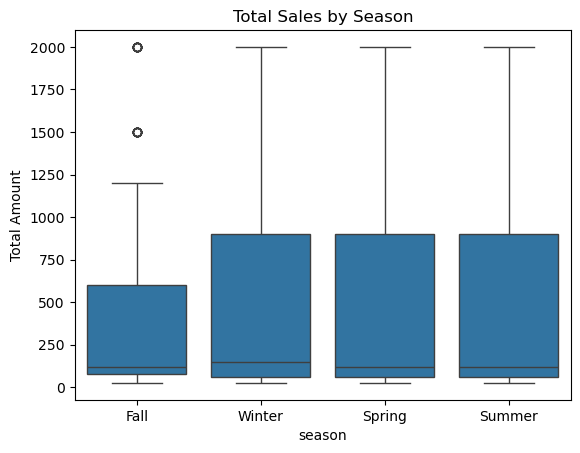

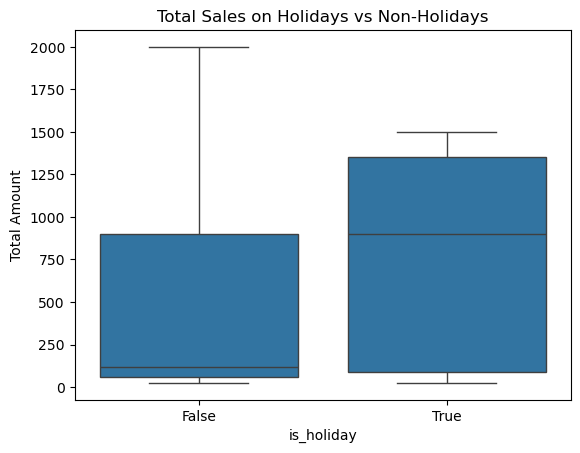

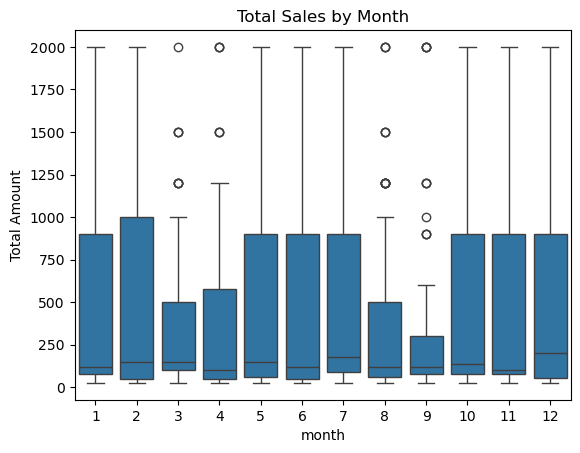

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot average sales by season
sns.boxplot(x='season', y='Total Amount', data=retail_data)
plt.title('Total Sales by Season')
plt.show()

# Plot sales on holidays vs non-holidays
sns.boxplot(x='is_holiday', y='Total Amount', data=retail_data)
plt.title('Total Sales on Holidays vs Non-Holidays')
plt.show()

# Plot sales by month
sns.boxplot(x='month', y='Total Amount', data=retail_data)
plt.title('Total Sales by Month')
plt.show()


In [7]:
# Select relevant features
features = ['month', 'quarter', 'day_of_week', 'season', 'is_holiday']

# Convert categorical columns to numerical (e.g., using one-hot encoding)
retail_data = pd.get_dummies(retail_data, columns=['season'], drop_first=True)

# Define X (features) and y (target)
X = retail_data[features]
y = retail_data['Total Amount']

# Proceed with model training (e.g., Linear Regression, Random Forest, etc.)


KeyError: "['season'] not in index"

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
#from fbprophet import Prophet

# Split data for model comparison
X = retail_data[features]  # your features
y = retail_data['Total Amount']  # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    #"XGBoost": XGBRegressor(n_estimators=100),
    # More models can be added here
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name}:")
    print(f"  RMSE: {rmse}")
    print(f"  R-squared: {r2}")
    print(f"  MSE: {mse}")
    print("-" * 50)

# For SARIMA and Prophet, the setup is more specific, but you can similarly evaluate their performance.
